In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configure plots
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (12, 6)


In [3]:
# Load the dataset
file_path = '../Data/Week2_challenge_data_source.xlsx'  
data = pd.read_excel(file_path)

# Display the first few rows and basic info
display(data.head())
data.info()


,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [4]:
# Check for missing values
missing_summary = data.isnull().sum().reset_index()
missing_summary.columns = ["Column", "Missing Values"]
missing_summary["Percentage"] = (missing_summary["Missing Values"] / len(data)) * 100
display(missing_summary)

# Replace missing values with column mean/mode as appropriate
for col in data.columns:
    if data[col].dtype == 'object':
        data[col].fillna(data[col].mode()[0], inplace=True)
    else:
        data[col].fillna(data[col].mean(), inplace=True)

# Verify no missing values remain
data.isnull().sum().sum()


,Column,Missing Values,Percentage
0,Bearer Id,0,0.000000
1,Start,1,0.000667
2,Start ms,1,0.000667
3,End,1,0.000667
4,End ms,1,0.000667
5,Dur. (ms),1,0.000667
6,IMSI,570,0.379997
7,MSISDN/Number,1066,0.710662
8,IMEI,572,0.381331
9,Last Location Name,1153,0.768662


/tmp/ipykernel_8256/628466111.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data[col].fillna(data[col].mode()[0], inplace=True)
/tmp/ipykernel_8256/628466111.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', t

np.int64(0)

Top 10 Handsets:


Handset Type
Huawei B528S-23A                20324
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64

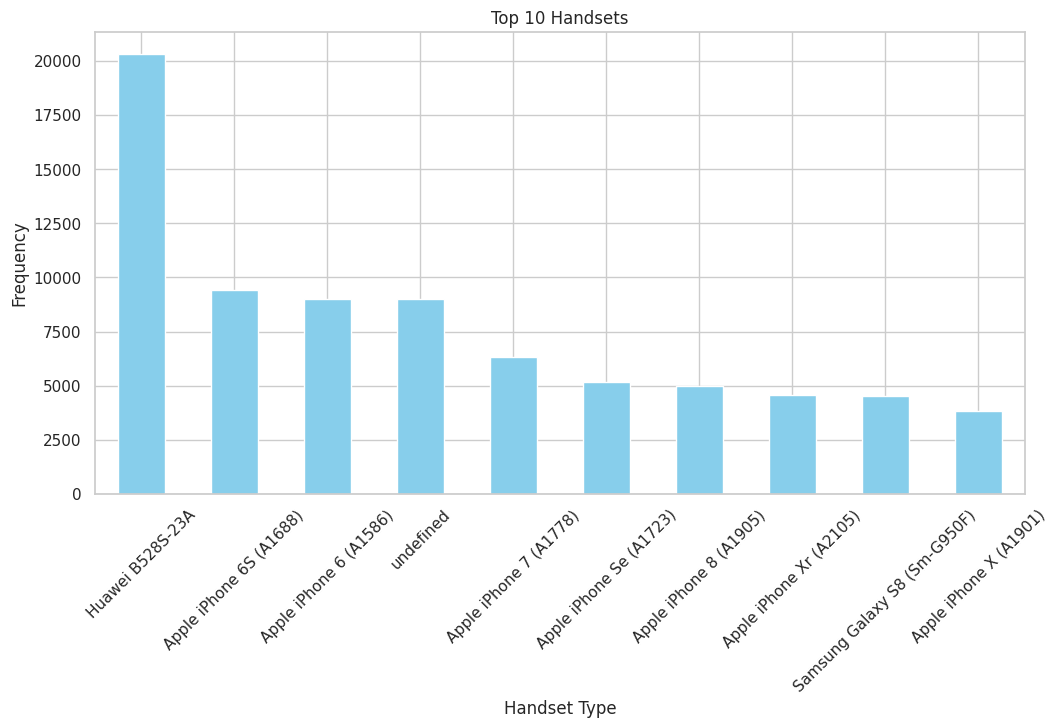

In [5]:
# Identify the top 10 handsets
top_10_handsets = data['Handset Type'].value_counts().head(10)
print("Top 10 Handsets:")
display(top_10_handsets)

# Plot the top 10 handsets
top_10_handsets.plot(kind='bar', color='skyblue')
plt.title('Top 10 Handsets')
plt.ylabel('Frequency')
plt.xlabel('Handset Type')
plt.xticks(rotation=45)
plt.show()


Top 3 Manufacturers:


Handset Manufacturer
Apple      60137
Samsung    40839
Huawei     34423
Name: count, dtype: int64


Top 5 Handsets for Apple:


Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

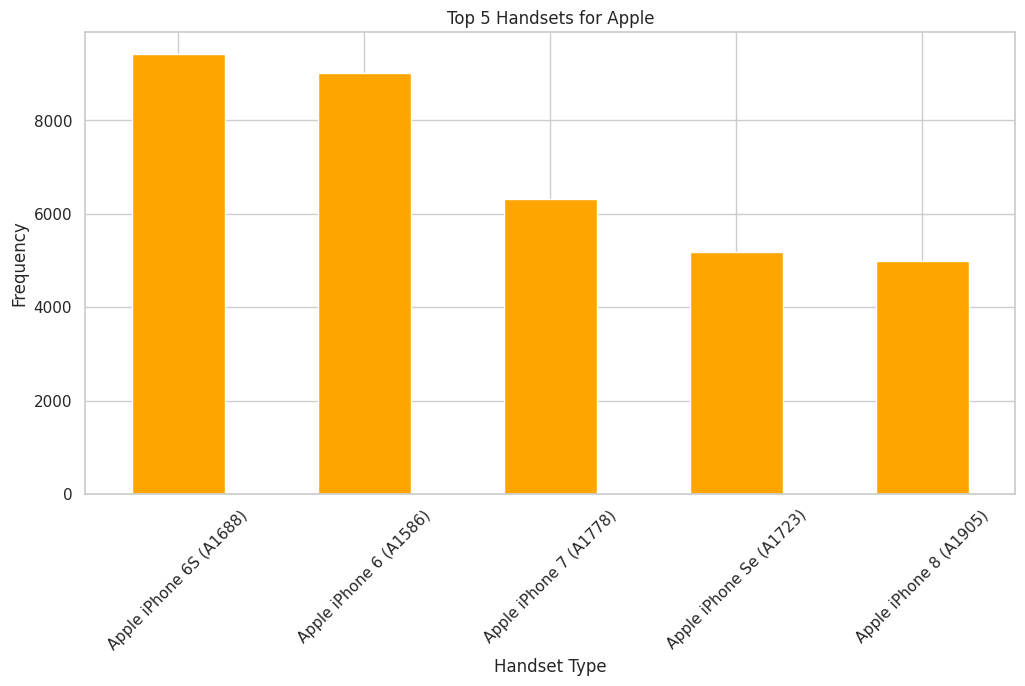


Top 5 Handsets for Samsung:


Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

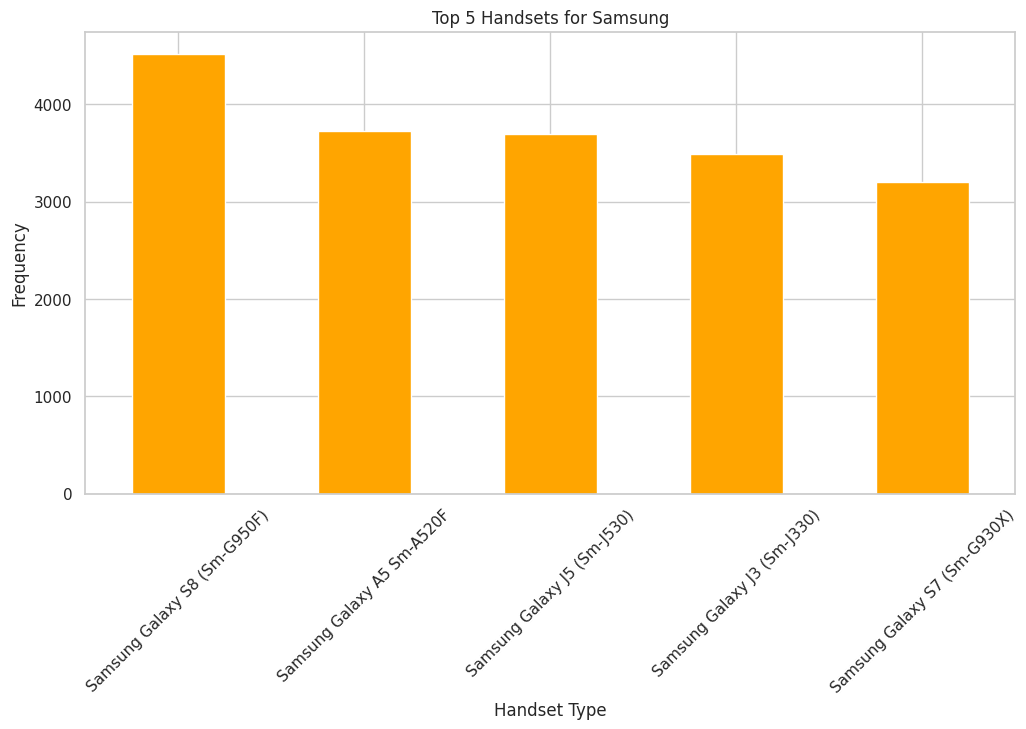


Top 5 Handsets for Huawei:


Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64

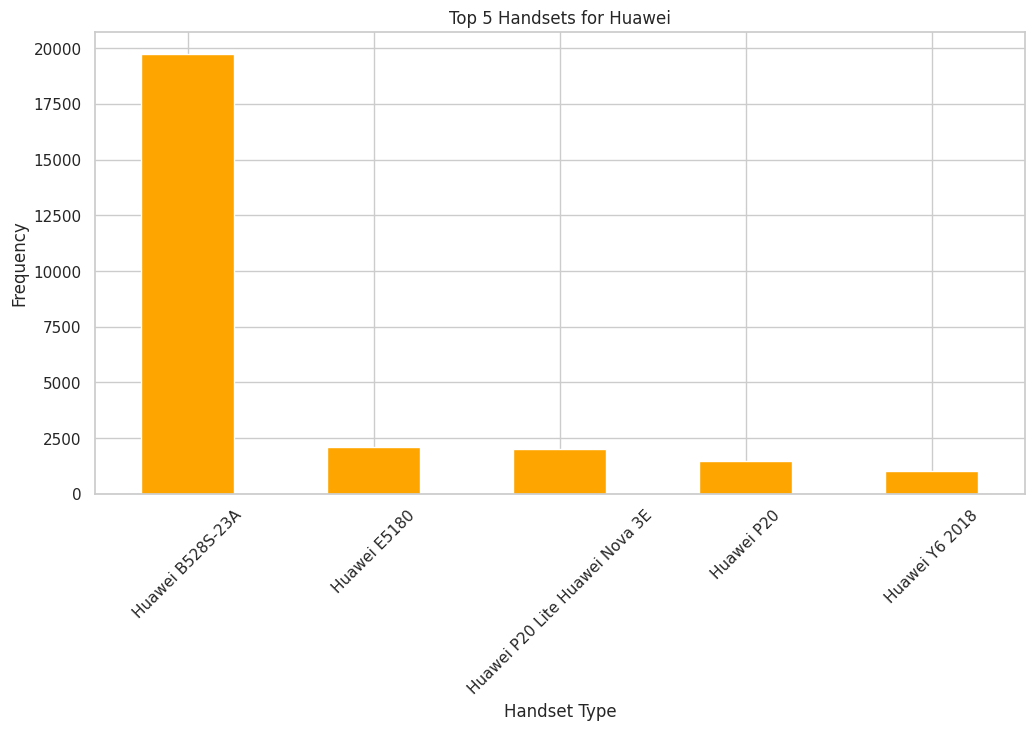

In [6]:
# Identify the top 3 handset manufacturers
top_3_manufacturers = data['Handset Manufacturer'].value_counts().head(3)
print("Top 3 Manufacturers:")
display(top_3_manufacturers)

# Get top 5 handsets for each manufacturer
for manufacturer in top_3_manufacturers.index:
    top_handsets = data[data['Handset Manufacturer'] == manufacturer]['Handset Type'].value_counts().head(5)
    print(f"\nTop 5 Handsets for {manufacturer}:")
    display(top_handsets)

    # Plot top handsets per manufacturer
    top_handsets.plot(kind='bar', color='orange')
    plt.title(f'Top 5 Handsets for {manufacturer}')
    plt.ylabel('Frequency')
    plt.xlabel('Handset Type')
    plt.xticks(rotation=45)
    plt.show()


In [9]:
# Aggregate xDR metrics per user
xdr_metrics = data.groupby('MSISDN/Number').agg({
    'Dur. (ms)': 'sum',  # Total session duration
    'Total UL (Bytes)': 'sum',  # Total upload volume
    'Total DL (Bytes)': 'sum'   # Total download volume
}).reset_index()

# Add total data volume column
xdr_metrics['Total Data Volume (Bytes)'] = xdr_metrics['Total UL (Bytes)'] + xdr_metrics['Total DL (Bytes)']

# Display the aggregated metrics
display(xdr_metrics.head())


,MSISDN/Number,Dur. (ms),Total UL (Bytes),Total DL (Bytes),Total Data Volume (Bytes)
0,3.360100e+10,116720.0,36053108.0,8.426375e+08,8.786906e+08
1,3.360100e+10,181230.0,36104459.0,1.207552e+08,1.568596e+08
2,3.360100e+10,134969.0,39306820.0,5.566597e+08,5.959665e+08
3,3.360101e+10,49878.0,20327526.0,4.019932e+08,4.223207e+08
4,3.360101e+10,37104.0,94280527.0,1.363130e+09,1.457411e+09


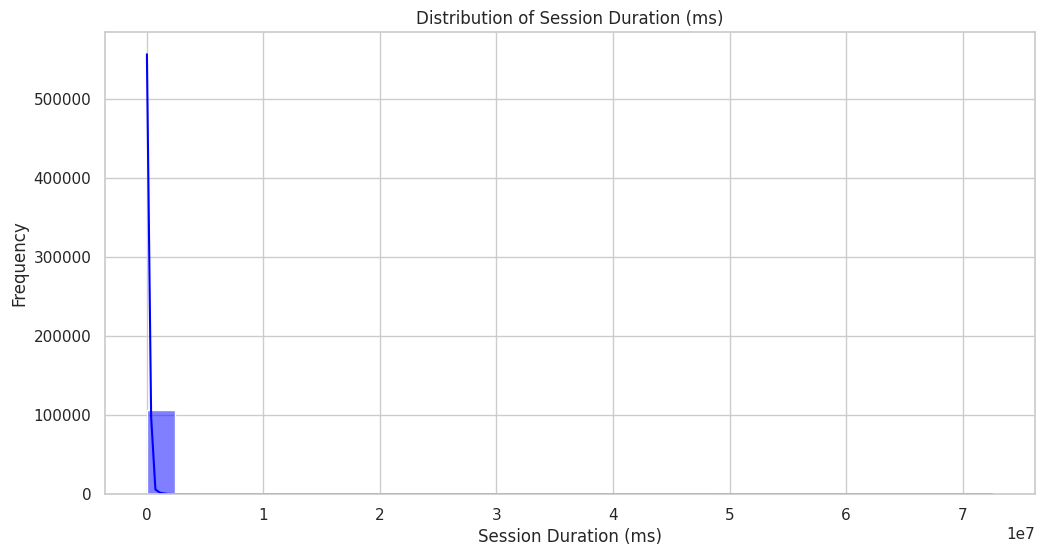

In [11]:
# Univariate Analysis: Dur. (ms)
sns.histplot(xdr_metrics['Dur. (ms)'], kde=True, bins=30, color='blue')
plt.title('Distribution of Session Duration (ms)')
plt.xlabel('Session Duration (ms)')
plt.ylabel('Frequency')
plt.show()


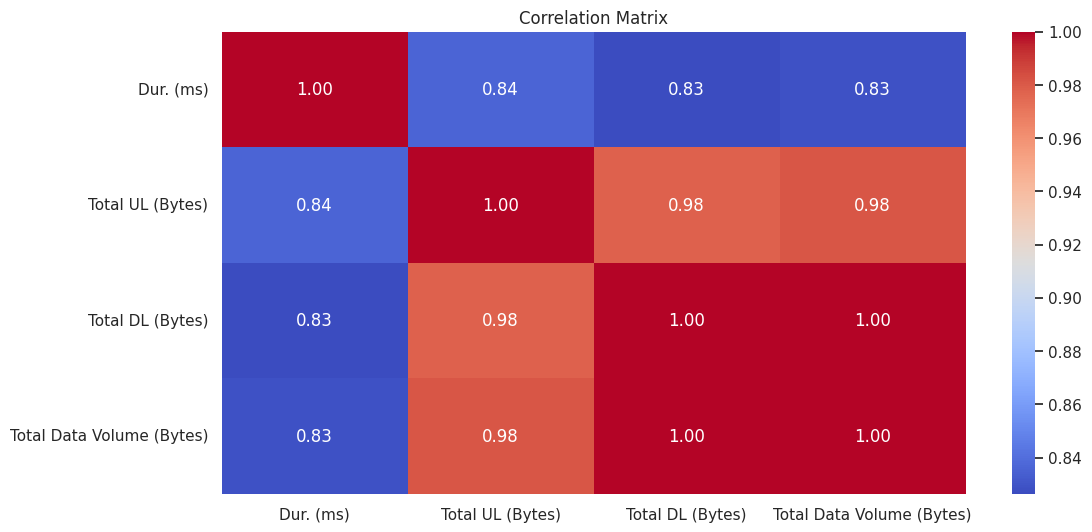

In [13]:
# Correlation matrix
corr_matrix = xdr_metrics[['Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)', 'Total Data Volume (Bytes)']].corr()

# Heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


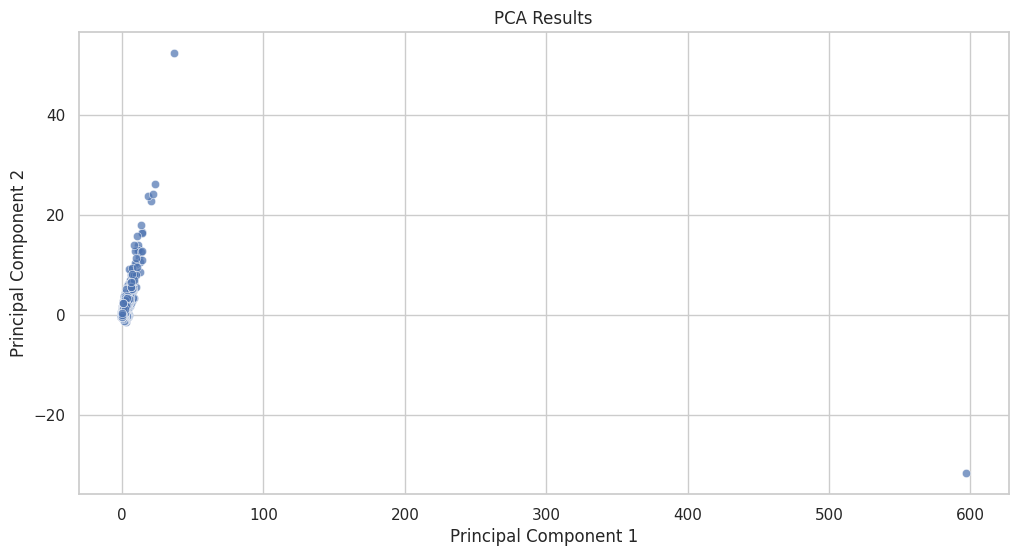

In [14]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(xdr_metrics[['Dur. (ms)', 'Total UL (Bytes)', 'Total DL (Bytes)', 'Total Data Volume (Bytes)']])

# Perform PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(scaled_data)

# Create a DataFrame with PCA results
pca_df = pd.DataFrame(pca_results, columns=['PC1', 'PC2'])
pca_df['MSISDN/Number'] = xdr_metrics['MSISDN/Number']

# Plot PCA results
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.7)
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()
